In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/IQ-OTH_NCCD lung cancer dataset.txt
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (246).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (155).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (311).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (45).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (298).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (359).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (230).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-O

In [2]:
!nvidia-smi

Sat Sep 28 17:42:24 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             12W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

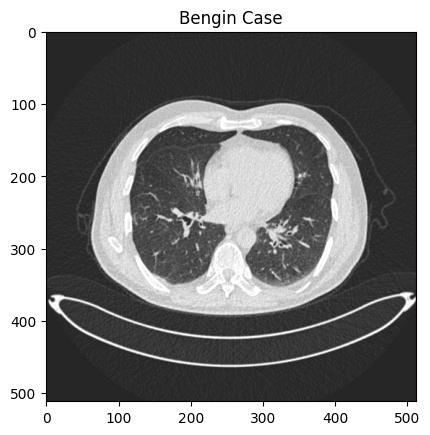

In [3]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg')
plt.title('Bengin Case')
plt.imshow(img, label = 'Bengin Case')

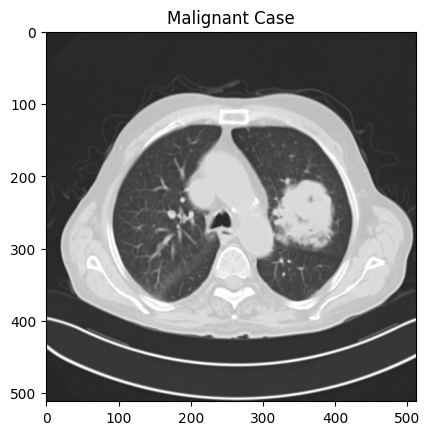

In [4]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (10).jpg')
plt.title('Malignant Case')
plt.imshow(img)

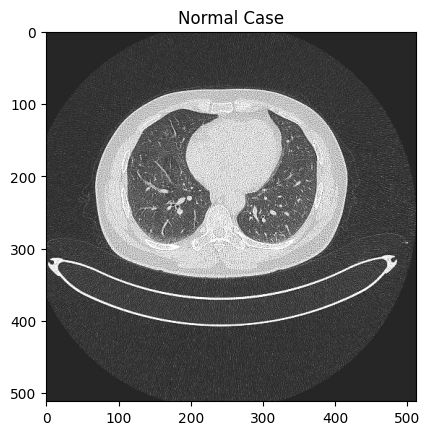

In [5]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (100).jpg')
plt.title('Normal Case')
plt.imshow(img)

In [6]:
img.shape

(512, 512, 3)

In [7]:
dir = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'
img_width = 256
img_height = 256

In [8]:
train_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.3, subset = "training")
test_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.2, subset = "validation")
val_data = image_dataset_from_directory(dir,label_mode = "categorical", image_size = (img_height, img_width),batch_size = 16, shuffle = True,seed = 12, validation_split = 0.1, subset = "validation")

Found 1097 files belonging to 3 classes.
Using 768 files for training.
Found 1097 files belonging to 3 classes.
Using 219 files for validation.
Found 1097 files belonging to 3 classes.
Using 109 files for validation.


In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(128, (2, 2), padding = 'same', input_shape = (img_height, img_width, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [11]:
adam = Adam(learning_rate = 0.0001)

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 128)  │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 128, 128, 128)  │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │    49,155,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │     4,501,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,365,515 (207.39 MB)

 Trainable params: 54,364,619 (207.38 MB)

 Non-trainable params: 896 (3.50 KB)

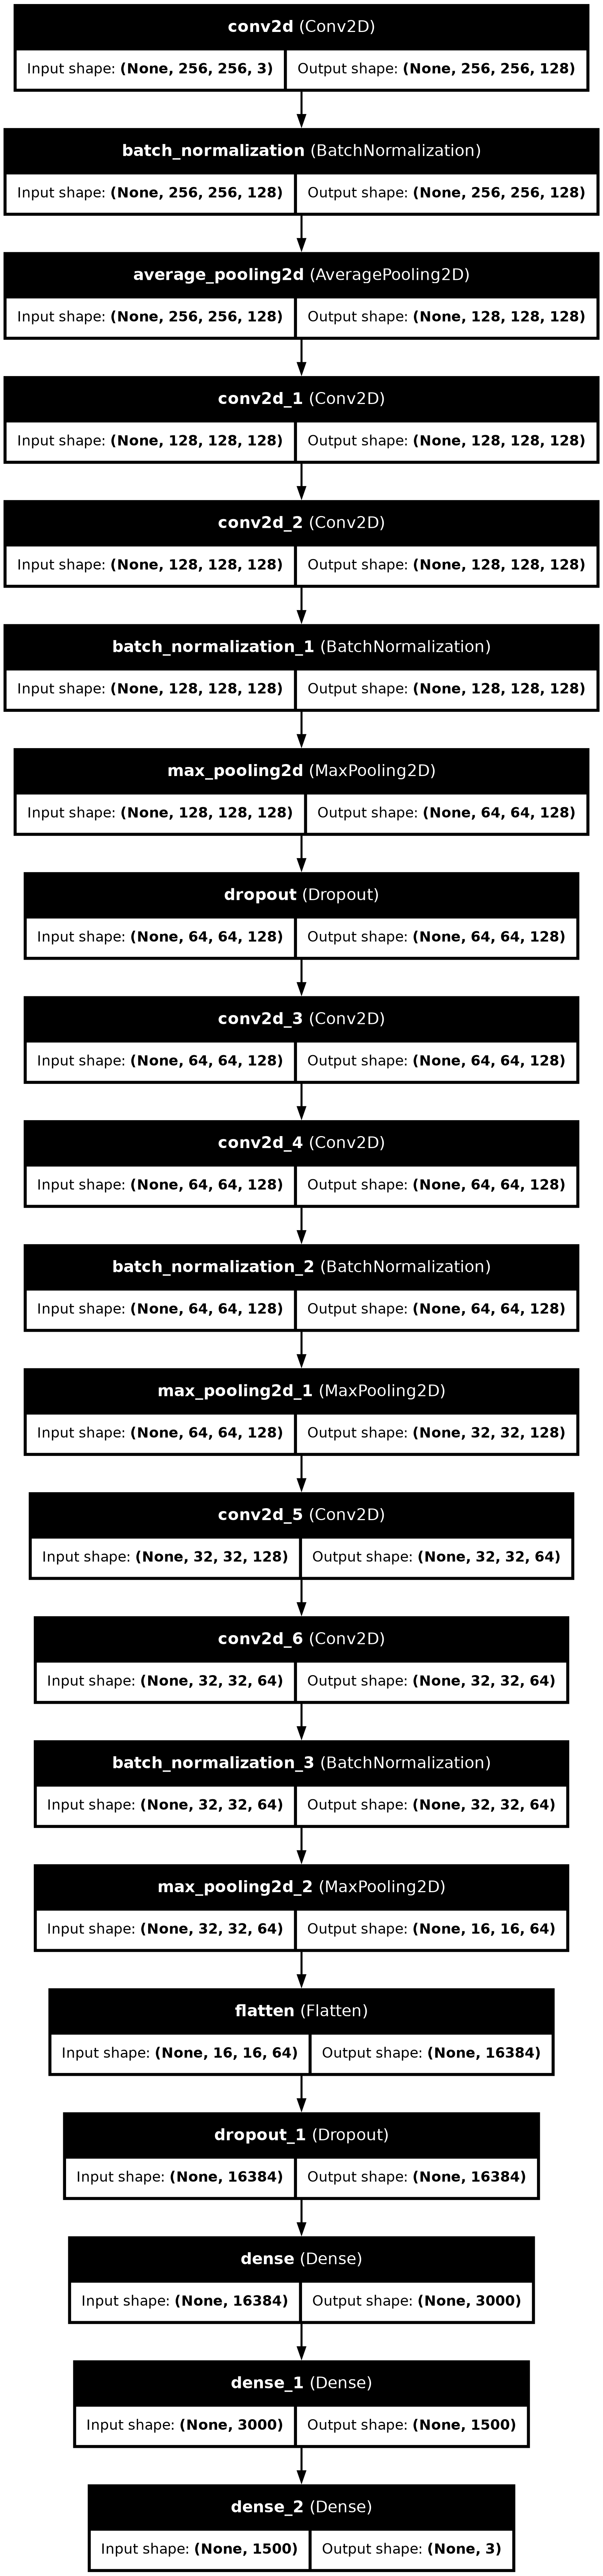

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 5, mode = 'max', verbose = 1)

In [16]:
path = '/kaggle/working/best.keras'
checkpoint = ModelCheckpoint(filepath = path, monitor = 'val_accuracy', mode = 'max', save_best_only = True, verbose = 1)

In [17]:
history = model.fit(train_data, validation_data = val_data, epochs = 100, callbacks = [early_stopping, checkpoint])

Epoch 1/100


I0000 00:00:1727545355.679100     113 service.cc:145] XLA service 0x7fb2bc0015c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727545355.679172     113 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727545355.679177     113 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/48 ━━━━━━━━━━━━━━━━━━━━ 16:35 21s/step - accuracy: 0.1875 - loss: 2.5656

I0000 00:00:1727545371.860892     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5424 - loss: 3.7359
Epoch 1: val_accuracy improved from -inf to 0.45872, saving model to /kaggle/working/best.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 273ms/step - accuracy: 0.5449 - loss: 3.7018 - val_accuracy: 0.4587 - val_loss: 1.0932
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9157 - loss: 0.2102
Epoch 2: val_accuracy improved from 0.45872 to 0.66972, saving model to /kaggle/working/best.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.9160 - loss: 0.2098 - val_accuracy: 0.6697 - val_loss: 0.7689
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9649 - loss: 0.1181
Epoch 3: val_accuracy improved from 0.66972 to 0.80734, saving model to /kaggle/working/best.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.9650 - loss: 0.1177 - val_accuracy: 0.8073 - val_loss: 0.5875
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9865 - loss: 0.0372
Epoch 4: val_acc

In [18]:
best_model = load_model(path)

In [20]:
loss, acc = best_model.evaluate(test_data)

print(f'\nAccuracy = {acc}\nLoss = {loss}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 262ms/step - accuracy: 0.9876 - loss: 0.0503

Accuracy = 0.990867555141449
Loss = 0.040989961475133896


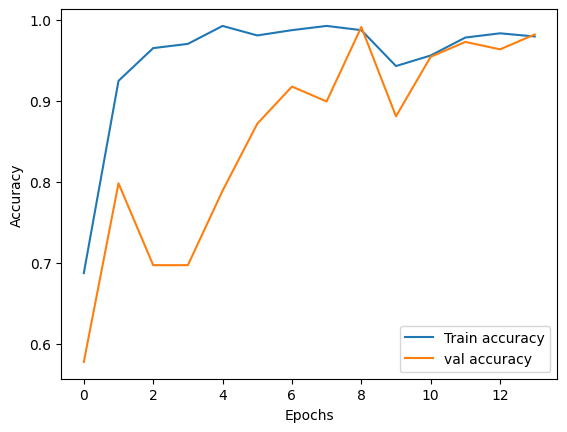

In [21]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

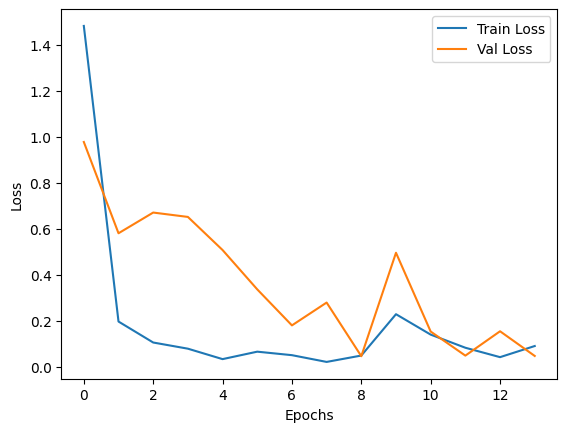

In [22]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')

In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load your model
best_model = load_model('/kaggle/working/best.keras')

def load_and_preprocess_image(img_path, img_height, img_width):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Scale pixel values to [0, 1]
    return img_array

# Path to your individual image
img_path = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (1).jpg'
img_height, img_width = 256, 256 

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path, img_height, img_width)

# Make predictions
predictions = best_model.predict(img_array)

# If your model uses categorical labels
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print(f'Predicted class index: {predicted_class[0]}')

# Assuming you have a list of class names
class_names = ['benign', 'malignant']  # Replace with your actual class names

# Print the predicted class name
print(f'Predicted class: {class_names[predicted_class[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
Predicted class index: 1
Predicted class: malignant


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
Predicted class index: 1
Predicted class: malignant


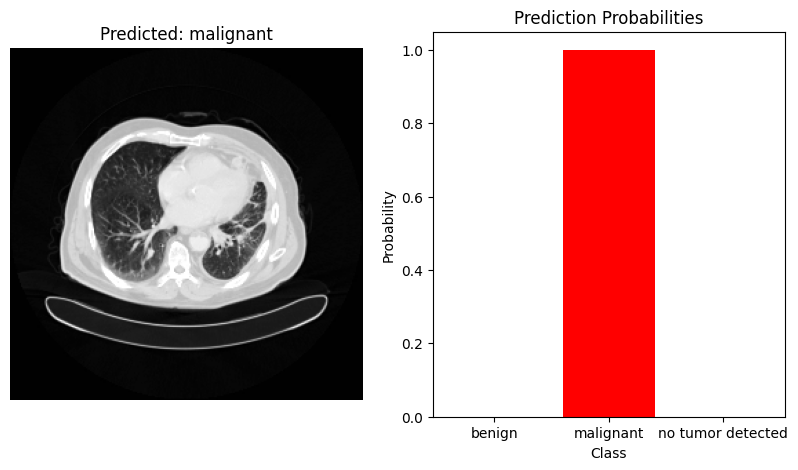

In [29]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load your model
best_model = load_model('/kaggle/working/best.keras')

def load_and_preprocess_image(img_path, img_height, img_width):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Scale pixel values to [0, 1]
    return img_array

# Path to your individual image
img_path = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (1).jpg'
img_height, img_width = 256, 256 

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path, img_height, img_width)

# Make predictions
predictions = best_model.predict(img_array)

# Get predicted class index
predicted_class = np.argmax(predictions, axis=1)

# Define class names
class_names = ['benign', 'malignant', 'no tumor detected']  # Updated class names

# Print the predicted class
print(f'Predicted class index: {predicted_class[0]}')
print(f'Predicted class: {class_names[predicted_class[0]]}')

# Plot the image
plt.figure(figsize=(10, 5))

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(image.array_to_img(img_array[0]))
plt.axis('off')
plt.title(f'Predicted: {class_names[predicted_class[0]]}')

# Plot the histogram of prediction probabilities
plt.subplot(1, 2, 2)
plt.bar(class_names, predictions[0], color=['blue', 'red', 'green'])  # Adjust colors for each class
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')

# Save the combined results
plt.savefig('result.jpg', bbox_inches='tight')  # Save the entire figure
plt.show()

# Save the histogram separately
plt.figure()
plt.bar(class_names, predictions[0], color=['blue', 'red', 'green'])  # Adjust colors for each class
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')
plt.savefig('stats.jpg', bbox_inches='tight')  # Save the histogram
plt.close()


In [22]:
model.save('Best_model.h5')

In [21]:
# import shutil

# # Move the model to the output directory for download
# shutil.move('Best_model.h5', '/kaggle/working/Best_model.h5')
from IPython.display import HTML

# Create a download link
download_link = '<a href="/kaggle/working/Best_model.h5" download>Download Best_model.h5</a>'
HTML(download_link)


In [23]:
print(tf.__version__)

2.16.1
